In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import time
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [2]:
df = pd.read_csv('../../data/analysis/emails_augmented.csv') 
assert 'body_no_stopwords' in df.columns and 'label' in df.columns, "Missing required columns."
X = df['body_no_stopwords']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
LogisticRegression_pipeline = joblib.load('../../output/models/LogisticRegression_tfidf.joblib')
MLPClassifier_pipeline = joblib.load('../../output/models/MLPClassifier_tfidf.joblib')
MultinomialNB_pipeline = joblib.load('../../output/models/MultinomialNB_tfidf.joblib')
RandomForest_pipeline = joblib.load('../../output/models/RandomForest_tfidf.joblib')

/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/sklearn/base.py:442: Inconsistent

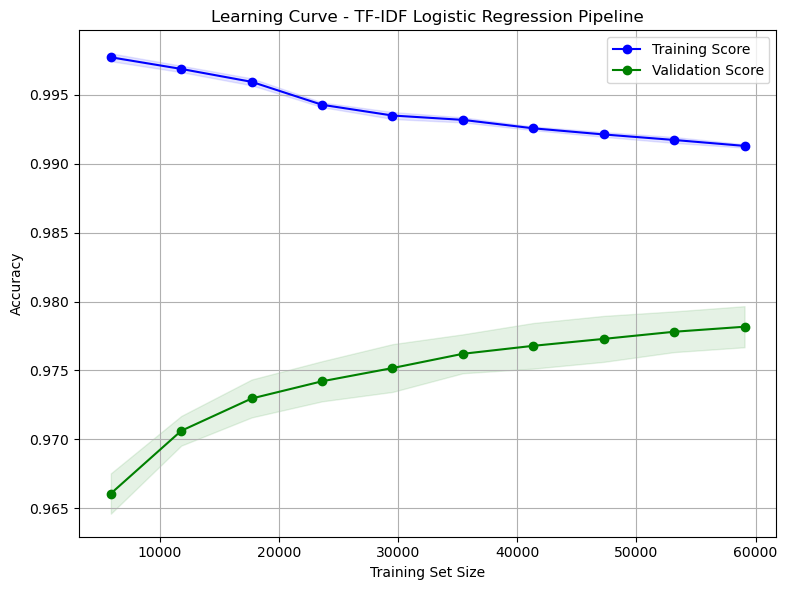

In [4]:
#Logistic Regression Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= LogisticRegression_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - TF-IDF Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_LogisticRegression_learning_curve.png', dpi=300)
plt.show()

In [ ]:
#MLP Classifier Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MLPClassifier_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - TF-IDF MLP Classifier Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_MLPClassifier_learning_curve.png', dpi=300)
plt.show()

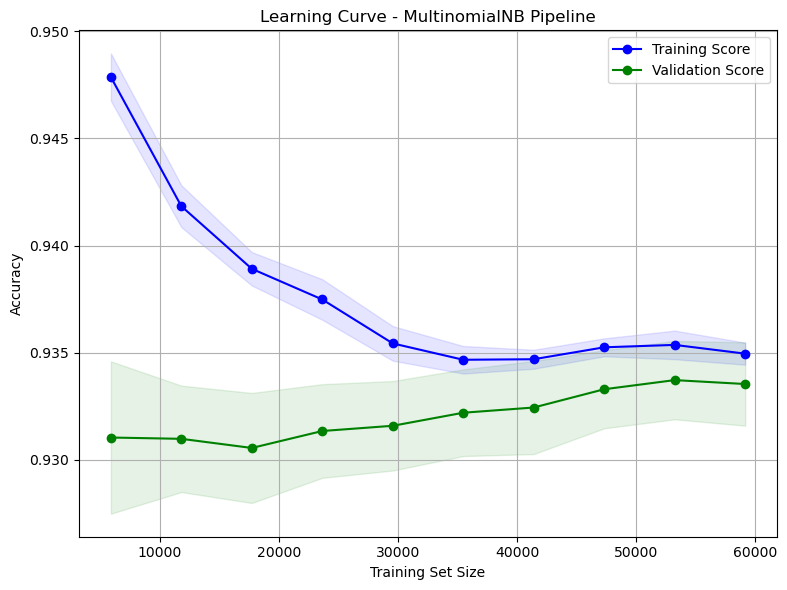

In [25]:
#MultinomialNB Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MultinomialNB_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - TF-IDF MultinomialNB Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_MultinomialNB_learning_curve.png', dpi=300)
plt.show()

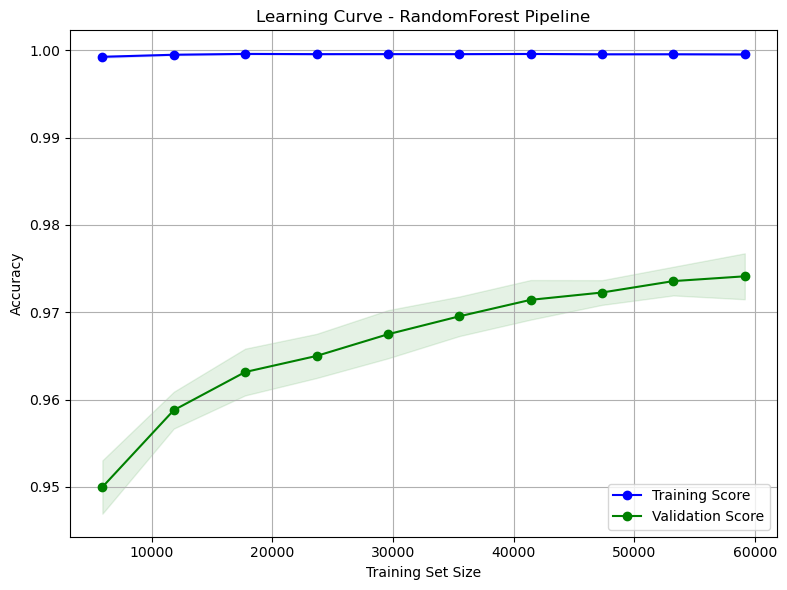

In [17]:
#RandomForest Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= RandomForest_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=16
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - TF-IDF RandomForest Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_RandomForest_learning_curve.png', dpi=300)
plt.show()

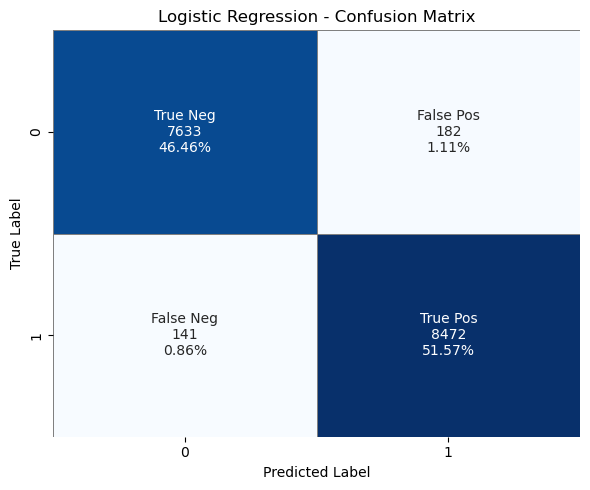

In [19]:
import seaborn as sns
#Logistic Regression Confusion Matrix
y_pred = LogisticRegression_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("TF-IDF Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()

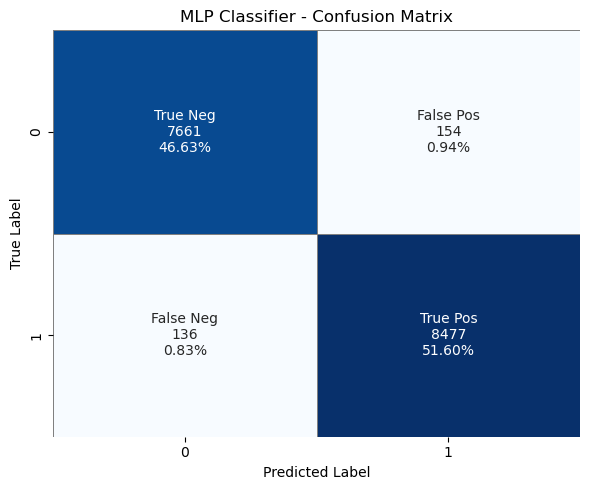

In [20]:
#MLP Classifier Confusion Matrix
y_pred = MLPClassifier_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("TF-IDF MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_MLPClassifier_confusion_matrix.png', dpi=300)
plt.show()

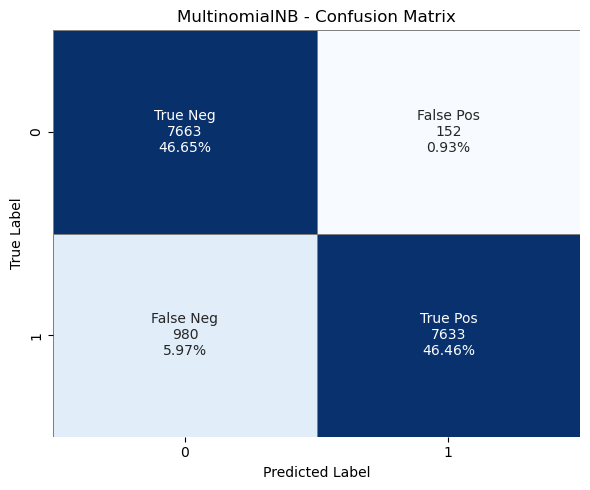

In [21]:
#MultinomialNB Confusion Matrix
y_pred = MultinomialNB_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("TF-IDF MultinomialNB - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_MultinomialNB_confusion_matrix.png', dpi=300)
plt.show()

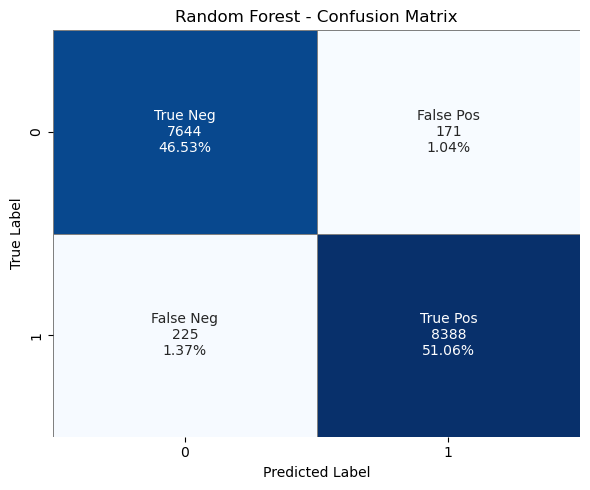

In [22]:
#RandomForest Confusion Matrix
y_pred = RandomForest_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("TF-IDF Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/TF-IDF_RandomForest_confusion_matrix.png', dpi=300)
plt.show()

In [5]:
results = []
pipelines = {
    "Logistic Regression": LogisticRegression_pipeline,
    "Multinomial Naive Bayes": MultinomialNB_pipeline,
    "MLP Classifier": MLPClassifier_pipeline,
    "Random Forest": RandomForest_pipeline
}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, 'predict_proba') else None
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary'),
        "ROC-AUC": roc,
        "Training Time (s)": round(end - start, 2)
    })

# Show results
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
df_results.to_csv("../../output/results/TF-IDF_model_comparison_results.csv", index=False)
print(df_results)



Training Logistic Regression...
Training Multinomial Naive Bayes...
Training MLP Classifier...
Training Random Forest...
                     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
2           MLP Classifier  0.982347   0.982157  0.984210  0.983183  0.997909   
0      Logistic Regression  0.980338   0.978969  0.983629  0.981294  0.997527   
3            Random Forest  0.975408   0.980339  0.972600  0.976454  0.996905   
1  Multinomial Naive Bayes  0.931093   0.980475  0.886219  0.930967  0.991672   

   Training Time (s)  
2             199.80  
0              19.70  
3             280.61  
1              17.57  


In [2]:
from joblib import load
import joblib
import os

input_dir = '../../output/embeddings'

X_train_emb = load(os.path.join(input_dir, 'X_train_emb.joblib'))
X_test_emb = load(os.path.join(input_dir, 'X_test_emb.joblib'))
y_train = load(os.path.join(input_dir, 'y_train.joblib'))
y_test = load(os.path.join(input_dir, 'y_test.joblib')) # Don't forget y_test!

In [3]:
LogisticRegression_pipeline = joblib.load('../../output/models/LogisticRegression_SBERT.joblib')
MLPClassifier_pipeline = joblib.load('../../output/models/MLPClassifier_SBERT.joblib')
GaussianNB_pipeline = joblib.load('../../output/models/GaussianNB_SBERT.joblib')
RandomForest_pipeline = joblib.load('../../output/models/RandomForest_SBERT.joblib')

In [4]:
#SBERT Logistic Regression Learning Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5) 

#Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=LogisticRegression_pipeline,
    X=X_train_emb,
    y=y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='accuracy',
    n_jobs=16,
    verbose=1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Validation score")

plt.title("Learning Curve - SBERT LogisticRegression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig('../../output/results/SBERT_LogisticRegression_learning_curve.png', dpi=300)
plt.show()

[learning_curve] Training set sizes: [ 5907 19200 32493 45786 59079]


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


KeyboardInterrupt: 

[learning_curve] Training set sizes: [ 5907 19200 32493 45786 59079]


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:  7.0min finished


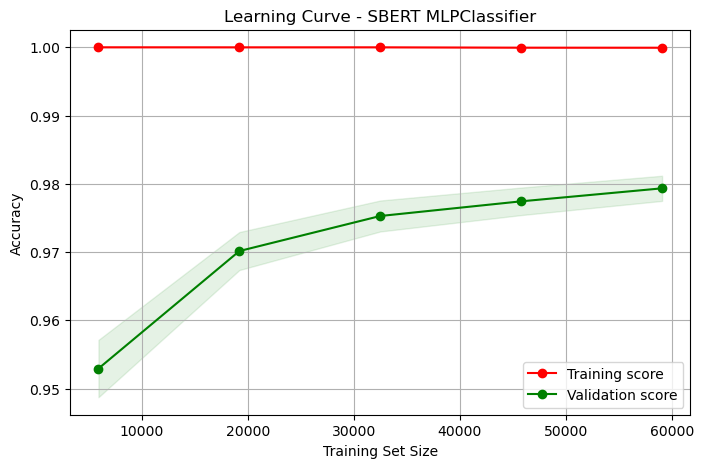

In [7]:
#SBERT MLPClassifier Learning Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5) 

#Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=MLPClassifier_pipeline,
    X=X_train_emb,
    y=y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='accuracy',
    n_jobs=16,
    verbose=1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Validation score")

plt.title("Learning Curve - SBERT MLPClassifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig('../../output/results/SBERT_MLPClassifier_learning_curve.png', dpi=300)
plt.show()

[learning_curve] Training set sizes: [ 5907 19200 32493 45786 59079]


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    4.8s finished


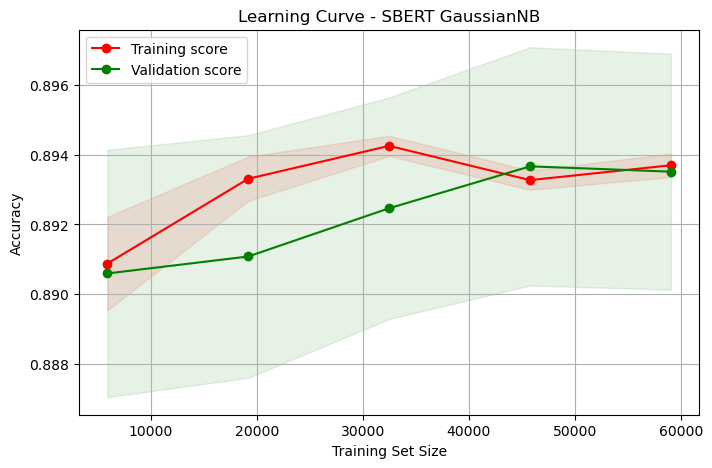

In [8]:
#SBERT GaussianNB Learning Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5) 

#Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=GaussianNB_pipeline,
    X=X_train_emb,
    y=y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='accuracy',
    n_jobs=16,
    verbose=1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Validation score")

plt.title("Learning Curve - SBERT GaussianNB")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig('../../output/results/SBERT_GaussianNB_learning_curve.png', dpi=300)
plt.show()

[learning_curve] Training set sizes: [ 5907 19200 32493 45786 59079]


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed: 14.7min finished


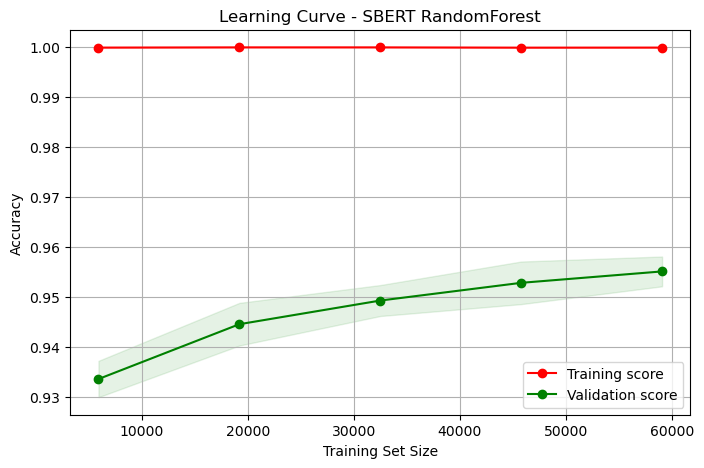

In [9]:
#SBERT RandomForest Learning Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5) 

#Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=RandomForest_pipeline,
    X=X_train_emb,
    y=y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='accuracy',
    n_jobs=16,
    verbose=1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Validation score")

plt.title("Learning Curve - SBERT RandomForest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig('../../output/results/SBERT_RandomForest_learning_curve.png', dpi=300)
plt.show()

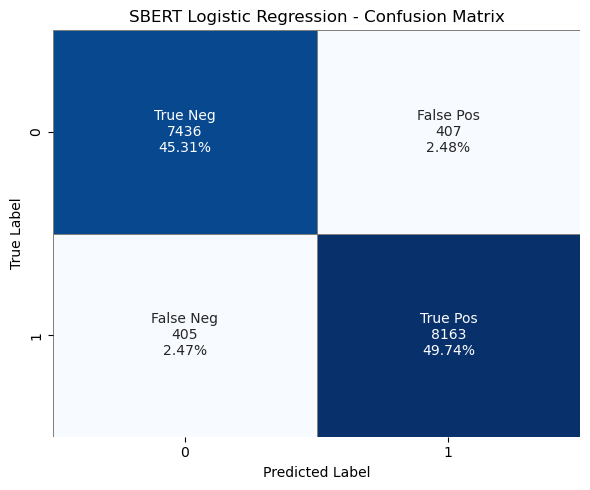

In [10]:
# SBERT LogisticRegression Confusion Matrix
y_pred = LogisticRegression_pipeline.predict(X_test_emb)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("SBERT Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/SBERT_LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()

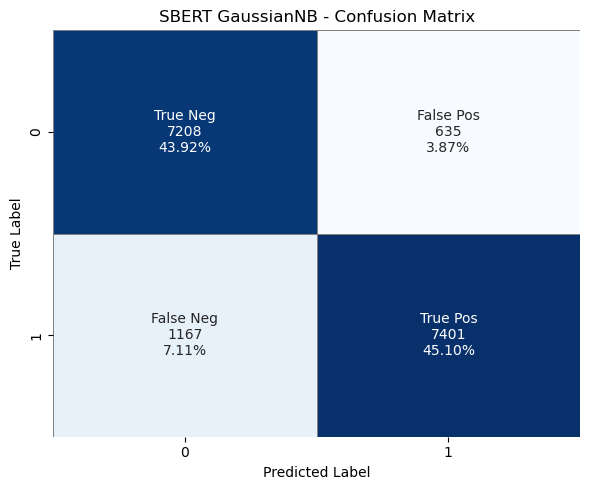

In [11]:
#SBERT GaussianNB Confusion Matrix
y_pred = GaussianNB_pipeline.predict(X_test_emb)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("SBERT GaussianNB - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/SBERT_GaussianNB_confusion_matrix.png', dpi=300)
plt.show()

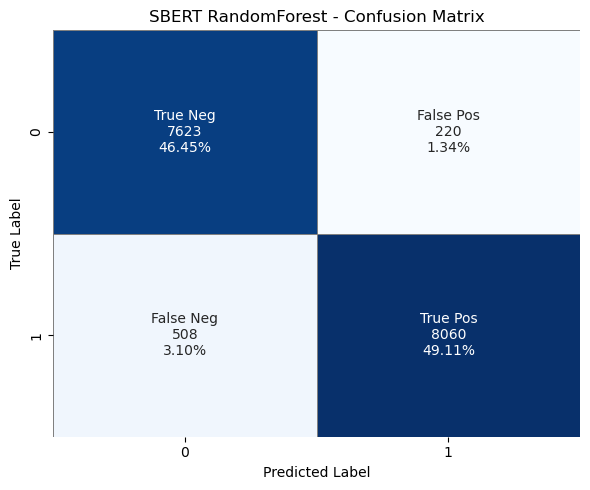

In [5]:
#SBERT RandomForest Confusion Matrix
y_pred = RandomForest_pipeline.predict(X_test_emb)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("SBERT RandomForest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/SBERT_RandomForest_confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
#SBERT MLP Classifier Confusion Matrix
y_pred = MLPClassifier_pipeline.predict(X_test_emb)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("SBERT MLPClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/SBERT_MLPClassifier_confusion_matrix.png', dpi=300)
plt.show()

In [6]:
#SBERT Results CSV
results = []

pipelines = {
    "Logistic Regression": LogisticRegression_pipeline,
    "Gaussian Naive Bayes": GaussianNB_pipeline,
    "MLP Classifier": MLPClassifier_pipeline,
    "Random Forest": RandomForest_pipeline
}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train_emb, y_train)


    y_pred = pipe.predict(X_test_emb)
    y_proba = pipe.predict_proba(X_test_emb)[:, 1] if hasattr(pipe, 'predict_proba') else None
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary'),
        "ROC-AUC": roc,
    })

# Show results
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
df_results.to_csv("../../output/results/SBERT_model_comparison_results.csv", index=False)
print(df_results)



Training Logistic Regression...
Training Gaussian Naive Bayes...
Training MLP Classifier...
Training Random Forest...
                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2        MLP Classifier  0.980684   0.980100  0.982960  0.981528  0.997622
3         Random Forest  0.954786   0.973042  0.939426  0.955938  0.992790
0   Logistic Regression  0.950521   0.952509  0.952731  0.952620  0.988330
1  Gaussian Naive Bayes  0.890196   0.920981  0.863796  0.891472  0.962670


In [5]:
import torch    # Get number of CPU threads used
torch.set_num_threads(16)
print(torch.get_num_threads())   

16


In [6]:
import pandas as pd
import torch
import shap
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

# Settings
MODEL_PATH = "../../phishing-bert-model"
CSV_PATH   = "../../data/analysis/emails_augmented.csv"
N_SAMPLE   = 50
MAX_EVALS  = 100

# 1) Load model & tokenizer from local disk
model     = BertForSequenceClassification.from_pretrained(MODEL_PATH, local_files_only=True)
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH, local_files_only=True)

# 2) Truncate helper to 512 WP‐tokens
def truncate_to_512(text: str) -> str:
    enc = tokenizer(text,
                    truncation=True,
                    max_length=512,
                    padding=False,
                    return_tensors=None)
    return tokenizer.decode(enc["input_ids"], skip_special_tokens=True)

# 3) Sample & truncate texts
df    = pd.read_csv(CSV_PATH)
texts = df["body_no_stopwords"].dropna().sample(N_SAMPLE, random_state=42).tolist()
texts = [truncate_to_512(t) for t in texts]

# 4) Build & patch HF pipeline to always truncate/pad
device = 0 if torch.cuda.is_available() else -1
pipe = pipeline("text-classification",
                model=model,
                tokenizer=tokenizer,
                return_all_scores=True,
                device=device)

# monkey‐patch to inject truncation/padding defaults
orig_call = pipe.__call__
def call_with_truncate(inputs, **kwargs):
    kwargs.setdefault("truncation", True)
    kwargs.setdefault("padding", "max_length")
    kwargs.setdefault("max_length", tokenizer.model_max_length)  # =512
    return orig_call(inputs, **kwargs)
pipe.__call__ = call_with_truncate

# 5) Create SHAP Explainer & compute shap_values
explainer   = shap.Explainer(pipe, shap.maskers.Text(tokenizer))
shap_values = explainer(texts, max_evals=MAX_EVALS)   # no plotting here

/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/

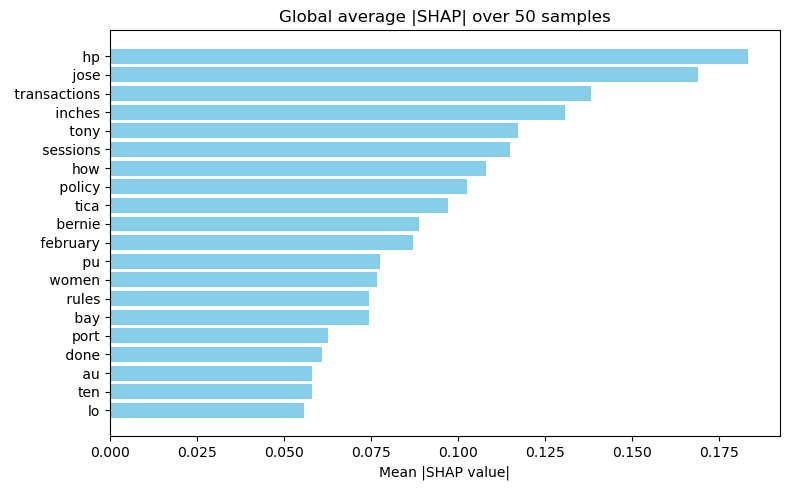

In [14]:
# Cell 2 – Global average SHAP bar‐plot

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# 1) Aggregate absolute SHAP by tokenimport pandas as pd
import numpy as np
import torch
import shap
import matplotlib.pyplot as plt

from collections import defaultdict
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

# ---------------- SETTINGS ----------------
MODEL_PATH  = "../../phishing-bert-model"
CSV_PATH    = "../../data/analysis/emails_augmented.csv"
N_SAMPLE    = 50      # how many e-mails to sample for SHAP
MAX_EVALS   = 50      # SHAP permutations per example
TOP_K       = 20      # top-K tokens in final plot
# ------------------------------------------

# 1) Load your fine-tuned BERT + tokenizer (local only)
model     = BertForSequenceClassification.from_pretrained(MODEL_PATH, local_files_only=True)
tokenizer = BertTokenizer       .from_pretrained(MODEL_PATH, local_files_only=True)

# 2) Build a HF pipeline (no truncation here)
device = 0 if torch.cuda.is_available() else -1
pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    device=device
)

# 3) Monkey-patch the pipeline to chunk & pool rather than truncate
orig_call = pipe.__call__
def chunk_and_pool_call(inputs, **kwargs):
    # ensure we work with a list of strings
    if isinstance(inputs, str):
        inputs = [inputs]
    all_probs = []  # will hold one [p0,p1] array per input email
    for txt in inputs:
        # encode WITHOUT special tokens, so we can chunk raw content
        ids = tokenizer.encode(txt, add_special_tokens=False)
        # break into 512‐token chunks
        chunks = [ids[i:i+512] for i in range(0, len(ids), 512)]
        # decode each chunk back to text
        chunk_texts = [tokenizer.decode(c, skip_special_tokens=True) for c in chunks]
        # run the original pipeline on each chunk
        chunk_preds = orig_call(chunk_texts, **kwargs)
        # chunk_preds is a list-of-lists-of-dicts, shape = (n_chunks, n_classes)
        # build a (n_chunks × n_classes) array of scores
        scores = np.vstack([[d["score"] for d in pred] for pred in chunk_preds])
        # average across chunks → one vector per email
        avg_score = scores.mean(axis=0)
        all_probs.append(avg_score.tolist())
    return np.array(all_probs)

pipe.__call__ = chunk_and_pool_call

# 4) Build SHAP Explainer with the text‐masker
explainer = shap.Explainer(pipe, shap.maskers.Text(tokenizer))

# 5) Sample N_SAMPLE emails and compute SHAP attributions
df    = pd.read_csv(CSV_PATH)
texts = df["body_no_stopwords"].dropna().sample(N_SAMPLE, random_state=42).tolist()
shap_values = explainer(texts, max_evals=MAX_EVALS)

# 6) Aggregate absolute‐SHAP by token across all samples
token2abs = defaultdict(list)
for exp in shap_values:
    vals = exp.values
    # if you have two‐class outputs, pick the positive class (class index 1)
    if vals.ndim == 2:
        vals = vals[:,1]
    for tok, v in zip(exp.data, vals):
        token2abs[tok].append(abs(v))

# 7) Compute mean(|SHAP|) per token and pick top‐K
token2mean = {t: np.mean(vs) for t, vs in token2abs.items()}
topk = sorted(token2mean.items(), key=lambda x: -x[1])[:TOP_K]
tokens, means = zip(*topk)

# 8) Draw one horizontal bar‐plot of the global average |SHAP|
ypos = np.arange(len(tokens))
plt.figure(figsize=(8,5))
plt.barh(ypos, means, color="skyblue")
plt.yticks(ypos, tokens)
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title(f"Global Top {TOP_K} Tokens by Average |SHAP| over {N_SAMPLE} e-mails")
plt.tight_layout()
plt.savefig("bert_shap_global_avg_chunking.png", dpi=300)
plt.show()import pandas as pd
import numpy as np
import torch
import shap
import matplotlib.pyplot as plt

from collections import defaultdict
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

# ---------------- SETTINGS ----------------
MODEL_PATH  = "../../phishing-bert-model"
CSV_PATH    = "../../data/analysis/emails_augmented.csv"
N_SAMPLE    = 50      # how many e-mails to sample for SHAP
MAX_EVALS   = 50      # SHAP permutations per example
TOP_K       = 20      # top-K tokens in final plot
# ------------------------------------------

# 1) Load your fine-tuned BERT + tokenizer (local only)
model     = BertForSequenceClassification.from_pretrained(MODEL_PATH, local_files_only=True)
tokenizer = BertTokenizer       .from_pretrained(MODEL_PATH, local_files_only=True)

# 2) Build a HF pipeline (no truncation here)
device = 0 if torch.cuda.is_available() else -1
pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    device=device
)

# 3) Monkey-patch the pipeline to chunk & pool rather than truncate
orig_call = pipe.__call__
def chunk_and_pool_call(inputs, **kwargs):
    # ensure we work with a list of strings
    if isinstance(inputs, str):
        inputs = [inputs]
    all_probs = []  # will hold one [p0,p1] array per input email
    for txt in inputs:
        # encode WITHOUT special tokens, so we can chunk raw content
        ids = tokenizer.encode(txt, add_special_tokens=False)
        # break into 512‐token chunks
        chunks = [ids[i:i+512] for i in range(0, len(ids), 512)]
        # decode each chunk back to text
        chunk_texts = [tokenizer.decode(c, skip_special_tokens=True) for c in chunks]
        # run the original pipeline on each chunk
        chunk_preds = orig_call(chunk_texts, **kwargs)
        # chunk_preds is a list-of-lists-of-dicts, shape = (n_chunks, n_classes)
        # build a (n_chunks × n_classes) array of scores
        scores = np.vstack([[d["score"] for d in pred] for pred in chunk_preds])
        # average across chunks → one vector per email
        avg_score = scores.mean(axis=0)
        all_probs.append(avg_score.tolist())
    return np.array(all_probs)

pipe.__call__ = chunk_and_pool_call

# 4) Build SHAP Explainer with the text‐masker
explainer = shap.Explainer(pipe, shap.maskers.Text(tokenizer))

# 5) Sample N_SAMPLE emails and compute SHAP attributions
df    = pd.read_csv(CSV_PATH)
texts = df["body_no_stopwords"].dropna().sample(N_SAMPLE, random_state=42).tolist()
shap_values = explainer(texts, max_evals=MAX_EVALS)

# 6) Aggregate absolute‐SHAP by token across all samples
token2abs = defaultdict(list)
for exp in shap_values:
    vals = exp.values
    # if you have two‐class outputs, pick the positive class (class index 1)
    if vals.ndim == 2:
        vals = vals[:,1]
    for tok, v in zip(exp.data, vals):
        token2abs[tok].append(abs(v))

# 7) Compute mean(|SHAP|) per token and pick top‐K
token2mean = {t: np.mean(vs) for t, vs in token2abs.items()}
topk = sorted(token2mean.items(), key=lambda x: -x[1])[:TOP_K]
tokens, means = zip(*topk)

# 8) Draw one horizontal bar‐plot of the global average |SHAP|
ypos = np.arange(len(tokens))
plt.figure(figsize=(8,5))
plt.barh(ypos, means, color="skyblue")
plt.yticks(ypos, tokens)
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title(f"Global Top {TOP_K} Tokens by Average |SHAP| over {N_SAMPLE} e-mails")
plt.tight_layout()
plt.savefig("bert_shap_global_avg_chunking.png", dpi=300)
plt.show()
token2vals = defaultdict(list)
for exp in shap_values:
    if vals.ndim == 2:
        vals = vals[:, 1]
    for tok, v in zip(exp.data, vals):
        token2vals[tok].append(abs(v))

token2mean = {tok: np.mean(vs) for tok, vs in token2vals.items()}

K = 20
top = sorted(token2mean.items(), key=lambda x: -x[1])[:K]
tokens, means = zip(*top)

ypos = np.arange(len(tokens))
plt.figure(figsize=(8,5))
plt.barh(ypos, means, color="skyblue")
plt.yticks(ypos, tokens)
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title(f"Global average |SHAP| over {len(shap_values)} samples")
plt.tight_layout()
plt.savefig("bert_shap_global_average_bar.png", dpi=300)
plt.show()

In [15]:
import pandas as pd
import numpy as np
import torch
import shap
import matplotlib.pyplot as plt

from collections import defaultdict
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

# ---------------- SETTINGS ----------------
MODEL_PATH  = "../../phishing-bert-model"
CSV_PATH    = "../../data/analysis/emails_augmented.csv"
N_SAMPLE    = 50      # how many e-mails to sample for SHAP
MAX_EVALS   = 50      # SHAP permutations per example
TOP_K       = 20      # top-K tokens in final plot
# ------------------------------------------

# 1) Load your fine-tuned BERT + tokenizer (local only)
model     = BertForSequenceClassification.from_pretrained(MODEL_PATH, local_files_only=True)
tokenizer = BertTokenizer       .from_pretrained(MODEL_PATH, local_files_only=True)

# 2) Build a HF pipeline (no truncation here)
device = 0 if torch.cuda.is_available() else -1
pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    device=device
)

# 3) Monkey-patch the pipeline to chunk & pool rather than truncate
orig_call = pipe.__call__
def chunk_and_pool_call(inputs, **kwargs):
    # ensure we work with a list of strings
    if isinstance(inputs, str):
        inputs = [inputs]
    all_probs = []  # will hold one [p0,p1] array per input email
    for txt in inputs:
        # encode WITHOUT special tokens, so we can chunk raw content
        ids = tokenizer.encode(txt, add_special_tokens=False)
        # break into 512‐token chunks
        chunks = [ids[i:i+512] for i in range(0, len(ids), 512)]
        # decode each chunk back to text
        chunk_texts = [tokenizer.decode(c, skip_special_tokens=True) for c in chunks]
        # run the original pipeline on each chunk
        chunk_preds = orig_call(chunk_texts, **kwargs)
        # chunk_preds is a list-of-lists-of-dicts, shape = (n_chunks, n_classes)
        # build a (n_chunks × n_classes) array of scores
        scores = np.vstack([[d["score"] for d in pred] for pred in chunk_preds])
        # average across chunks → one vector per email
        avg_score = scores.mean(axis=0)
        all_probs.append(avg_score.tolist())
    return np.array(all_probs)

pipe.__call__ = chunk_and_pool_call

# 4) Build SHAP Explainer with the text‐masker
explainer = shap.Explainer(pipe, shap.maskers.Text(tokenizer))

# 5) Sample N_SAMPLE emails and compute SHAP attributions
df    = pd.read_csv(CSV_PATH)
texts = df["body_no_stopwords"].dropna().sample(N_SAMPLE, random_state=42).tolist()
shap_values = explainer(texts, max_evals=MAX_EVALS)

# 6) Aggregate absolute‐SHAP by token across all samples
token2abs = defaultdict(list)
for exp in shap_values:
    vals = exp.values
    # if you have two‐class outputs, pick the positive class (class index 1)
    if vals.ndim == 2:
        vals = vals[:,1]
    for tok, v in zip(exp.data, vals):
        token2abs[tok].append(abs(v))

# 7) Compute mean(|SHAP|) per token and pick top‐K
token2mean = {t: np.mean(vs) for t, vs in token2abs.items()}
topk = sorted(token2mean.items(), key=lambda x: -x[1])[:TOP_K]
tokens, means = zip(*topk)

# 8) Draw one horizontal bar‐plot of the global average |SHAP|
ypos = np.arange(len(tokens))
plt.figure(figsize=(8,5))
plt.barh(ypos, means, color="skyblue")
plt.yticks(ypos, tokens)
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title(f"Global Top {TOP_K} Tokens by Average |SHAP| over {N_SAMPLE} e-mails")
plt.tight_layout()
plt.savefig("bert_shap_global_avg_chunking.png", dpi=300)
plt.show()

Device set to use cpu
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfence/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (550) must match the size of tensor b (512) at non-singleton dimension 1